# Change Point Analysis and Statistical Modeling for Assessing Event-Driven Impacts on Brent Oil Prices

# Overview
This study investigates how significant political, economic, and environmental events affect Brent oil prices. Using change point analysis and Bayesian statistical modeling, we aim to pinpoint key moments of change in historical price data and associate these changes with major events like policy shifts, geopolitical tensions, sanctions, and OPEC decisions. By understanding these links, stakeholders can gain insights into the dynamics driving oil market volatility.

# Business Need
The oil market's high volatility poses challenges for investors, policymakers, and energy companies. To effectively manage risk and strategize in response to rapid price shifts, these stakeholders require insights into the factors behind oil price changes. Birhan Energies, a consultancy specializing in energy market intelligence, aims to provide this actionable intelligence. Understanding how specific events impact Brent oil prices will help clients make informed investment decisions, develop resilient policies, and optimize operational strategies.

# Objective

1. Identify key events that have impacted Brent oil prices over the past decade.
2. Quantify the effect of each event on oil price changes.
3. Develop a comprehensive data-driven analysis framework for detecting change points in oil prices and linking them with causal events.
4. Generate insights to inform investment strategies, policy decisions, and operational planning for stakeholders in the energy sector.

# 1. Data Colllection

### Import Necessary Library

In [1]:
# logging
import os
import sys
import logging
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sys.path.append(os.path.abspath('../src'))
from data_logger import info_logger, error_logger
# Start logging
info_logger.info("Starting the oil price forcasing model.")

import matplotlib.pyplot as plt

2024-11-15 09:00:52,194 - INFO - Starting the oil price forcasing model.


### Load the Dataset

In [2]:
file_path = "../data/BrentOilPrices.csv"
try:
    df = pd.read_csv(file_path)
    df.head()

except FileNotFoundError:
        error_logger.error(f"File not found: {file_path}")


# 2. Data Preprocessing

### Convert Date to standard format

In [3]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
info_logger.info("The date is converted into standard date format.")
df.head()

2024-11-15 09:00:52,731 - INFO - The date is converted into standard date format.


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


# 3. Explanatory Data Analaysis

**Visualizing Full Data as a line plot**

2024-11-15 09:00:52,837 - INFO - Visulize full data as line plot.


Text(0.5, 1.0, 'Brent Oil Price Trend')

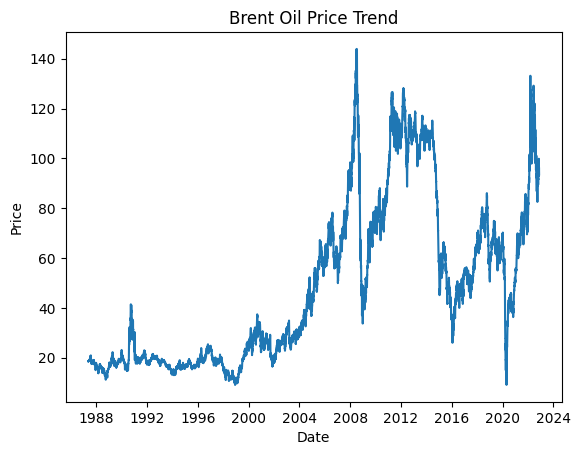

In [4]:
g = sns.lineplot(x='Date',y='Price',data = df)
info_logger.info("Visulize full data as line plot.")
plt.title("Brent Oil Price Trend")

**Function to plot Oil Price Trend between specific period**

In [5]:
def plot_price_trend(df, start_date, end_date):
    """
    This function filters the dataframe for the specified date range and 
    plots the line plot of the data using seaborn.
    
    The dataframe may not be indexed on any Datetime column.
    In this case, we use mask to filter out the date.
    
    PS - There is another function provided later in the notebook 
    which used indexed column to filter data
    """
    mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
    sdf = df.loc[mask]
    plt.figure(figsize = (10,5))
    chart = sns.lineplot(x='Date',y='Price',data = sdf)
#     chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.title("Brent Oil Price Trend")

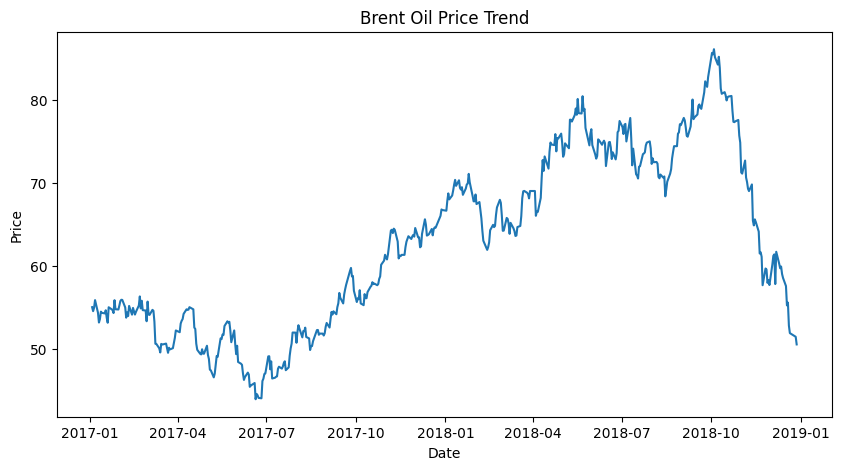

In [6]:
plot_price_trend(df,'2017-01-01','2019-01-01')

# 4. Train Test Split

In [7]:
# Split the dataset into training and testing sets
train_size = int(len(df) * 0.8)  # 80% for training
train, test = df[:train_size], df[train_size:]


# 5. Model Selection and Training

## 5.1 ARIMA model

In [8]:
# Fit an ARIMA model
from statsmodels.tsa.arima.model import ARIMA
ARMIA_model = ARIMA(train['Price'], order=(5, 1, 0))  # Example ARIMA(5,1,0)
ARIMA_model_fit = ARMIA_model.fit()
info_logger.info("ARIMA model successfully trained.")

# Make predictions for the training set and the test set
train_pred = ARIMA_model_fit.predict(start=train.index[0], end=train.index[-1], typ='levels')
test_pred = ARIMA_model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')


2024-11-15 09:00:53,835 - INFO - ARIMA model successfully trained.


In [9]:

# Forecast for the test period
ARIMA_forecast = ARIMA_model_fit.forecast(steps=len(test), alpha=0.05)  # 95% confidence interval
ARIMA_conf_int = ARIMA_model_fit.get_forecast(steps=len(test)).conf_int(alpha=0.05)  # Confidence intervals

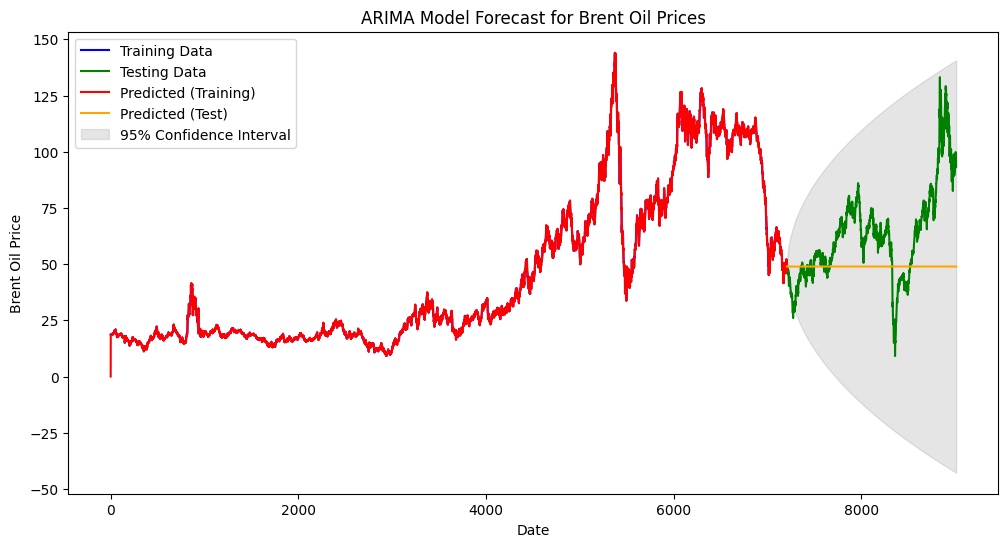

In [10]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train.index, train['Price'], label='Training Data', color='blue')

# Plot the test data
plt.plot(test.index, test['Price'], label='Testing Data', color='green')

# Plot the predicted data for training
plt.plot(train.index, train_pred, label='Predicted (Training)', color='red')

# Plot the forecasted data (predicted for the test period)
plt.plot(test.index, ARIMA_forecast, label='Predicted (Test)', color='orange')

# Plot the confidence intervals (shaded area)
plt.fill_between(test.index, ARIMA_conf_int.iloc[:, 0], ARIMA_conf_int.iloc[:, 1], color='gray', alpha=0.2, label="95% Confidence Interval")

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Brent Oil Price')
plt.title('ARIMA Model Forecast for Brent Oil Prices')

# Adding legend
plt.legend(loc='upper left')

plt.show()

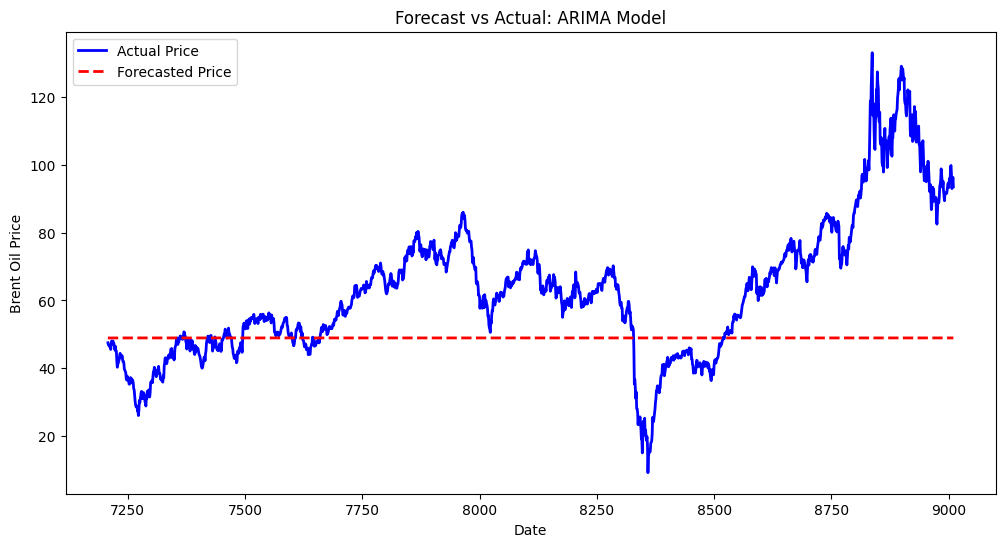

In [11]:
# Plotting: Comparison of Forecast vs Actual Prices
plt.figure(figsize=(12, 6))

# Plot the actual test data
plt.plot(test.index, test['Price'], label='Actual Price', color='blue', linewidth=2)

# Plot the forecasted values
plt.plot(test.index, ARIMA_forecast, label='Forecasted Price', color='red', linestyle='--', linewidth=2)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Brent Oil Price')
plt.title('Forecast vs Actual: ARIMA Model')

# Adding legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(train['Price'], train_pred)
mse_test = mean_squared_error(test['Price'], test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(train['Price'], train_pred)
mae_test = mean_absolute_error(test['Price'], test_pred)

# Calculate R-squared (R²)
r2_train = r2_score(train['Price'], train_pred)
r2_test = r2_score(test['Price'], test_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_train = np.mean(np.abs((train['Price'] - train_pred) / train['Price'])) * 100
mape_test = np.mean(np.abs((test['Price'] - test_pred) / test['Price'])) * 100

# Print the evaluation metrics
print("Training Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"R-squared (R²): {r2_train:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train:.4f}%")

print("\nTesting Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R-squared (R²): {r2_test:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.4f}%")


Training Set Metrics:
Mean Squared Error (MSE): 1.1717
Root Mean Squared Error (RMSE): 1.0824
Mean Absolute Error (MAE): 0.6572
R-squared (R²): 0.9990
Mean Absolute Percentage Error (MAPE): 1.5924%

Testing Set Metrics:
Mean Squared Error (MSE): 618.4236
Root Mean Squared Error (RMSE): 24.8681
Mean Absolute Error (MAE): 18.5123
R-squared (R²): -0.4525
Mean Absolute Percentage Error (MAPE): 27.8717%


## 5.2 SARIMA Model

In [ ]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Fit SARIMA model automatically using pmdarima's auto_arima function
SARIMA_model = auto_arima(train['Price'], seasonal=True, m=12, stepwise=True, trace=True)

# Print model summary
print(SARIMA_model.summary())

# Forecast for the test period
SARIMA_forecast, SARIMA_conf_int = SARIMA_model.predict(n_periods=len(test), return_conf_int=True)
info_logger.info("SARIMA model successfully trained.")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=17.60 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=21310.025, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=21304.057, Time=0.96 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=21303.911, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=21308.138, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=21301.927, Time=0.40 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=21303.910, Time=1.02 sec


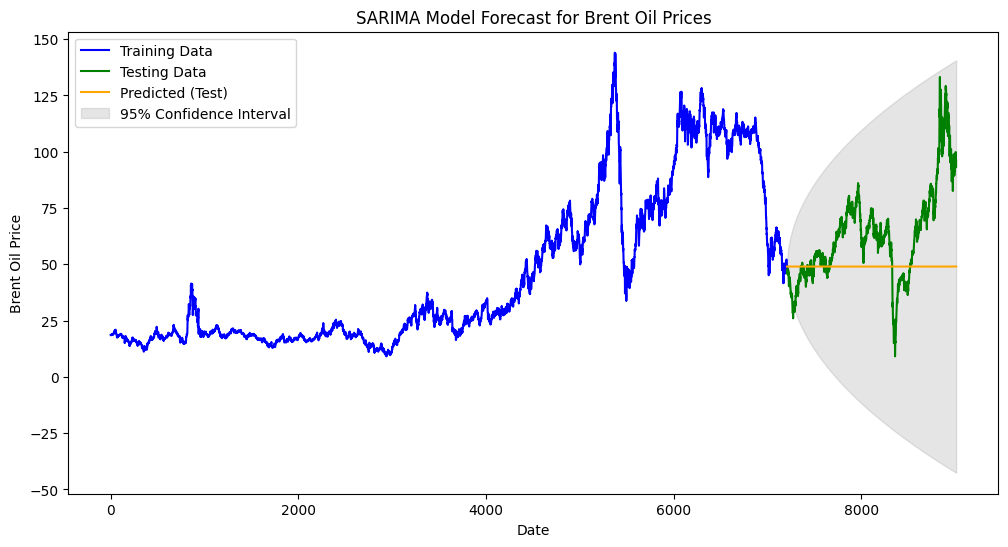

Mean Squared Error: 616.633730793602


In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train.index, train['Price'], label='Training Data', color='blue')

# Plot the test data
plt.plot(test.index, test['Price'], label='Testing Data', color='green')

# Plot the predicted data for the test set
plt.plot(test.index, SARIMA_forecast, label='Predicted (Test)', color='orange')

# Plot the confidence intervals (shaded area)
plt.fill_between(test.index, SARIMA_conf_int[:, 0], SARIMA_conf_int[:, 1], color='gray', alpha=0.2, label="95% Confidence Interval")

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Brent Oil Price')
plt.title('SARIMA Model Forecast for Brent Oil Prices')

# Adding legend
plt.legend(loc='upper left')

plt.show()

# Calculate and print the Mean Squared Error (MSE) for the predictions
mse = mean_squared_error(test['Price'], SARIMA_forecast)
print(f"Mean Squared Error: {mse}")

In [ ]:
# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(train['Price'], SARIMA_model.predict_in_sample())
mse_test = mean_squared_error(test['Price'], SARIMA_forecast)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(train['Price'], SARIMA_model.predict_in_sample())
mae_test = mean_absolute_error(test['Price'], SARIMA_forecast)

# Calculate R-squared (R²)
r2_train = r2_score(train['Price'], SARIMA_model.predict_in_sample())
r2_test = r2_score(test['Price'], SARIMA_forecast)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_train = np.mean(np.abs((train['Price'] - SARIMA_model.predict_in_sample()) / train['Price'])) * 100
mape_test = np.mean(np.abs((test['Price'] - SARIMA_forecast) / test['Price'])) * 100

# Print the evaluation metrics
print("Training Set Metrics (SARIMA):")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"R-squared (R²): {r2_train:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train:.4f}%")

print("\nTesting Set Metrics (SARIMA):")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R-squared (R²): {r2_test:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.4f}%")


Training Set Metrics (SARIMA):
Mean Squared Error (MSE): 1.1722
Root Mean Squared Error (RMSE): 1.0827
Mean Absolute Error (MAE): 0.6572
R-squared (R²): 0.9990
Mean Absolute Percentage Error (MAPE): 1.5926%

Testing Set Metrics (SARIMA):
Mean Squared Error (MSE): 616.6337
Root Mean Squared Error (RMSE): 24.8321
Mean Absolute Error (MAE): 18.4829
R-squared (R²): -0.4483
Mean Absolute Percentage Error (MAPE): 27.8484%


## 5.3 LSTM Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['Price']])
test_scaled = scaler.transform(test[['Price']])

In [ ]:
# Function to create the dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Prepare the training and testing data
time_step = 60  # Number of previous days to consider for prediction
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape the data to be compatible with LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
LSTM_model = Sequential()
LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
LSTM_model.add(LSTM(units=50, return_sequences=False))
LSTM_model.add(Dense(units=1))  # Output layer with a single unit for price prediction

# Compile the model
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
LSTM_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
info_logger.info("LSTM model successfully trained.")

# Make predictions on the test set
LSTM_predicted_prices = LSTM_model.predict(X_test)

# Invert the scaling to get the actual predicted prices
LSTM_predicted_prices = scaler.inverse_transform(LSTM_predicted_prices)
y_test_actual = scaler.inverse_transform([y_test])

Epoch 1/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.0090
Epoch 2/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 4.0866e-04
Epoch 3/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 4.2733e-04
Epoch 4/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 2.5414e-04
Epoch 5/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 2.3098e-04
Epoch 6/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 2.1313e-04
Epoch 7/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 2.1548e-04
Epoch 8/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 1.7153e-04
Epoch 9/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 1.7745e-04
Epoch 10/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 1.6169e-04
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


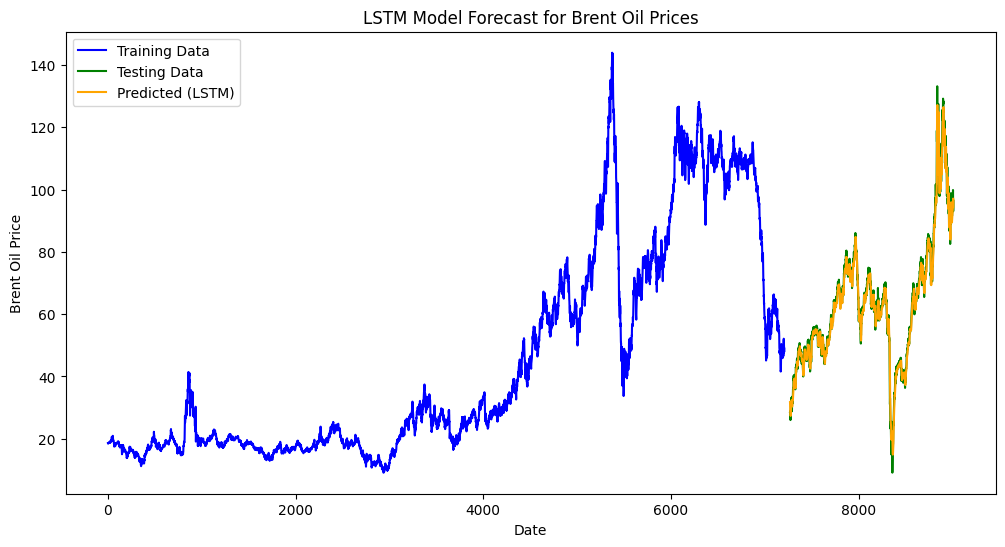

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(df.index[:train_size], train['Price'], label='Training Data', color='blue')

# Plot the testing data (adjusted to align with the length of predicted prices)
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_test_actual[0])], y_test_actual[0], label='Testing Data', color='green')

# Plot the predicted data (adjusted to match the length of the predicted values)
plt.plot(df.index[train_size + time_step:train_size + time_step + len(LSTM_predicted_prices)], LSTM_predicted_prices, label='Predicted (LSTM)', color='orange')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Brent Oil Price')
plt.title('LSTM Model Forecast for Brent Oil Prices')

# Adding legend
plt.legend(loc='upper left')

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_actual[0], LSTM_predicted_prices)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_actual[0], LSTM_predicted_prices)

# Calculate R-squared (R²)
r2 = r2_score(y_test_actual[0], LSTM_predicted_prices)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_actual[0] - LSTM_predicted_prices) / y_test_actual[0])) * 100

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")


Mean Squared Error (MSE): 5.9780
Root Mean Squared Error (RMSE): 2.4450
Mean Absolute Error (MAE): 1.7592
R-squared (R²): 0.9859
Mean Absolute Percentage Error (MAPE): 39.5365%
